In [1]:
## Setup

#python >= 3.5 nécessaire
import sys
assert sys.version_info >= (3, 5)

#scikit-learn >= 0.20 nécessaire
import sklearn
assert sklearn.__version__ >= "0.20"

# Autres imports
import numpy as np
import os

# pour rendre les output stables au fil des runs
np.random.seed(42)

# pour tracer de jolis graphes
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# où sauvegarder les figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.8.0'

In [4]:
keras.__version__

'2.8.0'

## Construire un classificateur d'image en utilisant une sequential API

On utilise Fashion MNIST qui a la même forme que MNIST, mais les images représentent des objets de mode au lieu de chiffres. Chaque classe est plus diverse, et le problème est beaucoup plus complexe.

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

Création du jeu de validation

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [9]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
X_test = X_test / 255

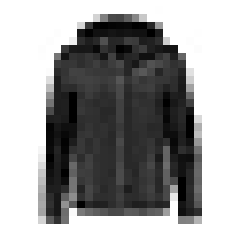

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [13]:
# Création des classes Fashion MNIST

class_names = ["T-shir/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
# Première image du JdE :
class_names[y_train[0]]

'Coat'

In [15]:
X_valid.shape

(5000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_diagram


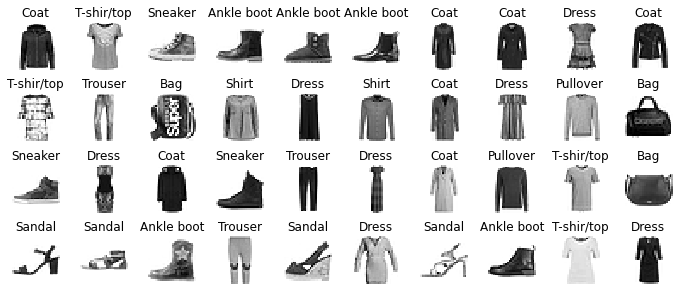

In [17]:
# Echantillon du dataset

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_diagram', tight_layout=False)
plt.show()

In [18]:
# Construction du NN :
#   MLP de classification avec deux hidden layers

model = keras.models.Sequential()   # Crée un modèle séquentiel (sequential API)
model.add(keras.layers.Flatten(input_shape=[28,28]))    # Première couche; flatten : image -> tab 1D + taille image
model.add(keras.layers.Dense(300, activation="relu"))   # couche cachée de 300 neurones avec relu comme fonction d'activation
model.add(keras.layers.Dense(100, activation="relu"))   # Pareil avec 100 neurones
model.add(keras.layers.Dense(10, activation="softmax")) # Output layer de 10 neurones (1/classe) avec softmax actfct car classes exclusives

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

On peut écrire plus rapidement avec cette forme :

In [20]:
"""model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[20,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])"""

'model = keras.models.Sequential([\n    keras.layers.Flatten(input_shape=[20,28]),\n    keras.layers.Dense(300, activation="relu"),\n    keras.layers.Dense(100, activation="relu"),\n    keras.layers.Dense(10, activation="softmax"),\n])'

In [21]:
model.layers

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


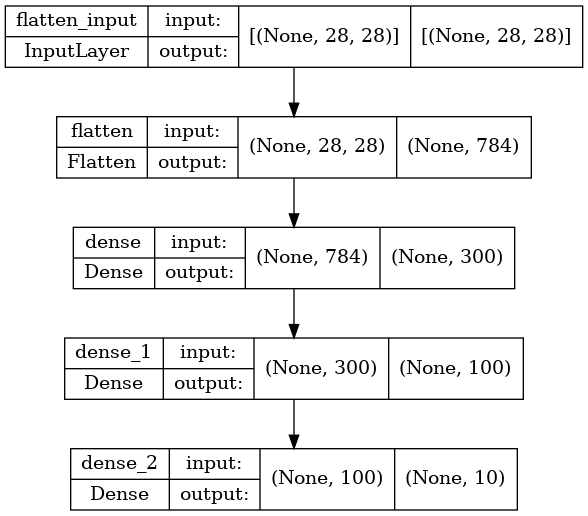

In [23]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [24]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [25]:
model.get_layer('dense') is hidden1

True

In [26]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02289999, -0.00147606,  0.01984628, ...,  0.04987892,
         0.0406944 , -0.01723183],
       [-0.03699992, -0.03727816, -0.01813942, ...,  0.03726716,
        -0.02766204,  0.00973767],
       [-0.03086628,  0.05213721, -0.00695608, ...,  0.04644381,
         0.05593675, -0.01193619],
       ...,
       [-0.0527398 , -0.0256734 , -0.005972  , ..., -0.06833544,
        -0.00664382, -0.00935574],
       [ 0.02236076,  0.06594138,  0.05732858, ...,  0.02020223,
         0.01196507,  0.03047074],
       [ 0.0430546 , -0.02390738,  0.05928753, ..., -0.03537909,
        -0.03248047, -0.06482322]], dtype=float32)

In [27]:
weights.shape

(784, 300)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
biases.shape

(300,)

In [30]:
model.compile(
    loss="sparse_categorical_crossentropy", # à cause des sparse labels et des classes exclusives
    optimizer="sgd",                        # on utilise sgd, penser au learning rate
    metrics=["accuracy"]                    # c'est important de mesurer la précison pendant l'entrainement et l'évaluation
)

In [31]:
# Entrainement et évaluation du modèle



history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 2s 869us/step - loss: 0.7013 - accuracy: 0.7659 - val_loss: 0.5175 - val_accuracy: 0.8270
Epoch 2/50
1719/1719 [==============================] - 1s 812us/step - loss: 0.4851 - accuracy: 0.8293 - val_loss: 0.4337 - val_accuracy: 0.8520
Epoch 3/50
1719/1719 [==============================] - 1s 823us/step - loss: 0.4397 - accuracy: 0.8451 - val_loss: 0.5249 - val_accuracy: 0.8070
Epoch 4/50
1719/1719 [==============================] - 1s 830us/step - loss: 0.4134 - accuracy: 0.8541 - val_loss: 0.3934 - val_accuracy: 0.8664
Epoch 5/50
1719/1719 [==============================] - 1s 822us/step - loss: 0.3954 - accuracy: 0.8618 - val_loss: 0.3786 - val_accuracy: 0.8682
Epoch 6/50
1719/1719 [==============================] - 1s 820us/step - loss: 0.3772 - accuracy: 0.8666 - val_loss: 0.3731 - val_accuracy: 0.8714
Epoch 7/50
1719/1719 [==============================] - 1s 819us/step - loss: 0.3650 - accuracy: 0.8702 - val_loss: 0.3691 -

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

In [33]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


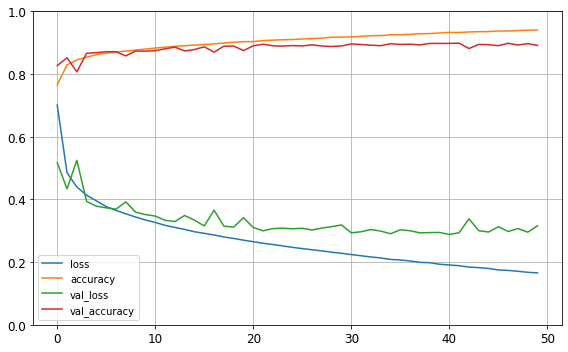

In [35]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 541us/step - loss: 0.3501 - accuracy: 0.8800


[0.3500973582267761, 0.8799999952316284]

In [41]:
# réaliser des prédictions

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
# y_pred = model.predict_classes(X_new)
# Cette fonction a été supprimée dans la version 2.6 de TensorFlow

# Il faut faire à la pace :
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [44]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)